<a href="https://colab.research.google.com/github/ANUJGAUR/Hotel-booking-analysis-project/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir_path = '/content/drive/MyDrive/'
df = pd.read_csv(dir_path+'Hotel Bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#Copy of dataframe
df1 = df.copy()
df1.shape

(119390, 32)

# **Cleaning dataset**

STEP 1 : Removed duplicates.

In [7]:
df[df1.duplicated()].shape

(31994, 32)

In [8]:
df1.drop_duplicates(inplace=True)

In [9]:
df1.shape

(87396, 32)

STEP 2 : Replace Null values.

In [10]:
df1.isnull().sum().sort_values(ascending=False)[:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

In [11]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [12]:
df1['children'].fillna(df1['children'].mean(),inplace = True)

In [13]:
df1['country'].fillna('others',inplace = True)

In [14]:
df1['company'].fillna(0,inplace = True)

In [15]:
df1['agent'].fillna(0,inplace = True)

In [16]:
df1.isnull().sum().sort_values(ascending=False)[:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [17]:
df1[df1['children']+df1['adults']+df1['babies'] == 0].shape

(166, 32)

In [18]:
df1.drop(df1.index[df1['adults']+df1['children']+df1['babies'] == 0],inplace = True)

STEP 3 : Change Datatype of columns.

In [19]:
df1[['children','company','agent']] = df1[['children','company','agent']].astype(int)

In [20]:
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'])

STEP 4 : Add columns.

In [21]:
df1['total_stay_time'] = df1['stays_in_week_nights'] + df1['stays_in_weekend_nights']

In [22]:
df1['total_people'] = df1['adults'] + df1['children'] + df1['babies']

In [23]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay_time,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  b

# **Relation between various important variables**

In [25]:
imp_df1 = df1[['is_canceled','lead_time','arrival_date_day_of_month','previous_cancellations','previous_bookings_not_canceled','booking_changes','deposit_type','adr','required_car_parking_spaces','total_stay_time','total_people'    
]]

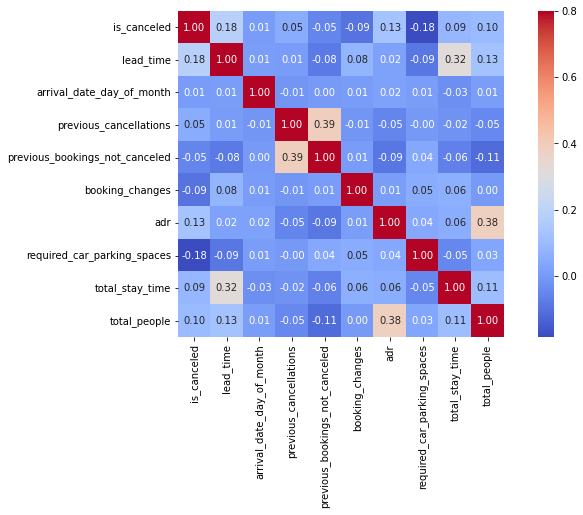

In [26]:
#corelation_matrix
relation_matrix= imp_df1.corr()
f, ax=plt.subplots(figsize=(12,6))
sns.heatmap(relation_matrix,annot = True,fmt='.2f', annot_kws={'size': 10},cmap='coolwarm', vmax=.8, square=True);

# **Hotel Wise Analysis**

In [27]:
city_hotel = df1[df1['hotel']=='City Hotel']
resort_hotel = df1[df1['hotel']=='Resort Hotel']

**Months analysis**

In [28]:
month_city_hotel = city_hotel.groupby('arrival_date_month').size().sort_values(ascending=False).reset_index(name='city_hotel')
month_resort_hotel = resort_hotel.groupby('arrival_date_month').size().sort_values(ascending=False).reset_index(name='resort_hotel')
hotel_month_count = pd.concat([month_city_hotel,month_resort_hotel],axis=1)
hotel_month_count = hotel_month_count.loc[:,~hotel_month_count.columns.duplicated()].copy()
hotel_month_count = hotel_month_count.set_index(['arrival_date_month'])

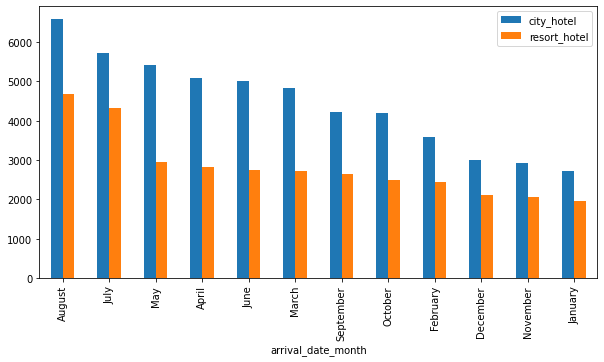

In [29]:
plt.rcParams["figure.figsize"] = (10,5)
hotel_month_count.plot(kind='bar')
plt.show()

Canceled analysis

In [32]:
meal_city_hotel = city_hotel.groupby('is_canceled').size().sort_values(ascending=False).reset_index(name='city_hotel')
meal_resort_hotel = resort_hotel.groupby('is_canceled').size().sort_values(ascending=False).reset_index(name='resort_hotel')
hotel_month_count = pd.concat([meal_city_hotel,meal_resort_hotel],axis=1)
hotel_month_count = hotel_month_count.loc[:,~hotel_month_count.columns.duplicated()].copy()
hotel_month_count = hotel_month_count.set_index(['is_canceled'])

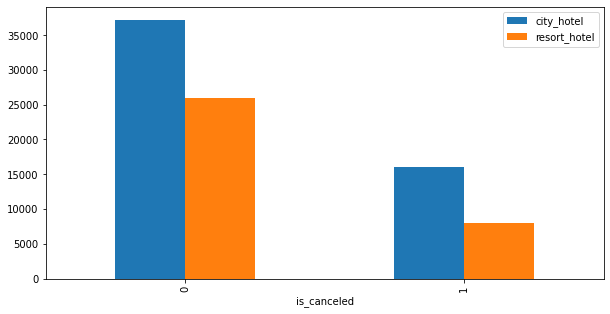

In [33]:
plt.rcParams["figure.figsize"] = (10,5)
hotel_month_count.plot(kind='bar')
plt.show()

**Country analysis**

In [34]:
meal_city_hotel = city_hotel.groupby('country').size().sort_values(ascending=False).reset_index(name='city_hotel')
meal_resort_hotel = resort_hotel.groupby('country').size().sort_values(ascending=False).reset_index(name='resort_hotel')
hotel_month_count = pd.concat([meal_city_hotel,meal_resort_hotel],axis=1)
hotel_month_count = hotel_month_count.loc[:,~hotel_month_count.columns.duplicated()].copy()
hotel_month_count = hotel_month_count.set_index(['country'])
hotel_month_count = hotel_month_count[:10]

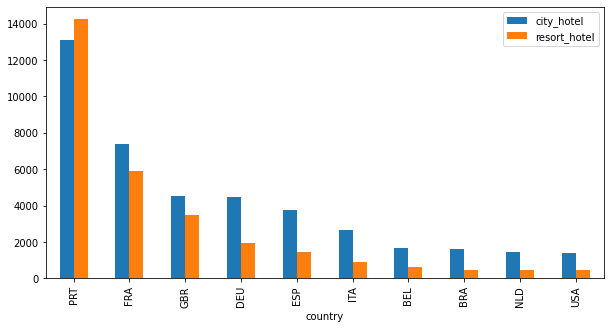

In [35]:
plt.rcParams["figure.figsize"] = (10,5)
hotel_month_count.plot(kind='bar')
plt.show()

**Optimal length of stay in order to get the best daily rate**

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


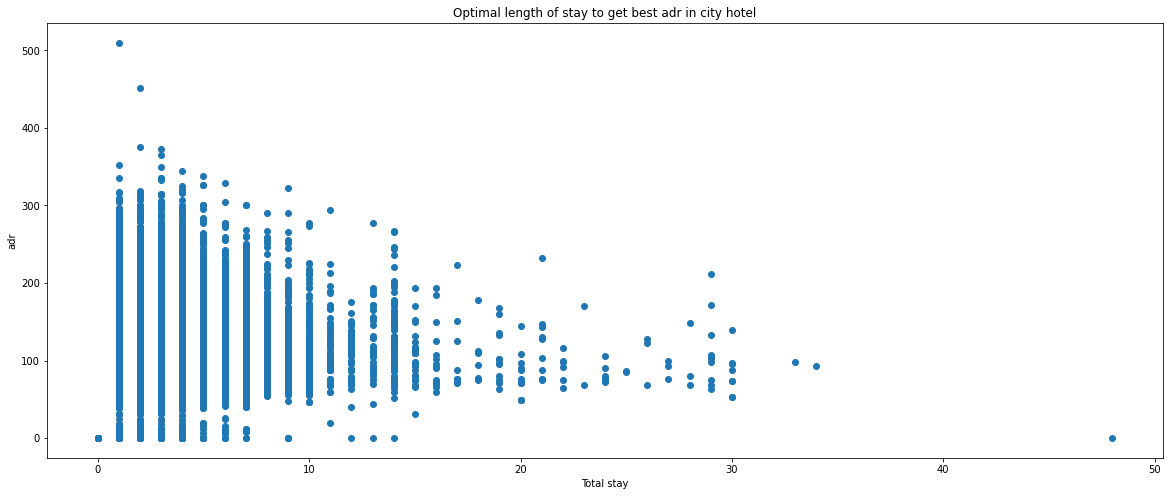

In [36]:
city_hotel.drop(city_hotel[city_hotel['adr'] > 5000].index, inplace = True)
x_label = city_hotel['total_stay_time']
y_label = city_hotel['adr']
plt.rcParams["figure.figsize"] = (20,8)
plt.scatter(x_label,y_label)
plt.gca().update(dict(title='Optimal length of stay to get best adr in city hotel', xlabel='Total stay', ylabel='adr'))
plt.show()

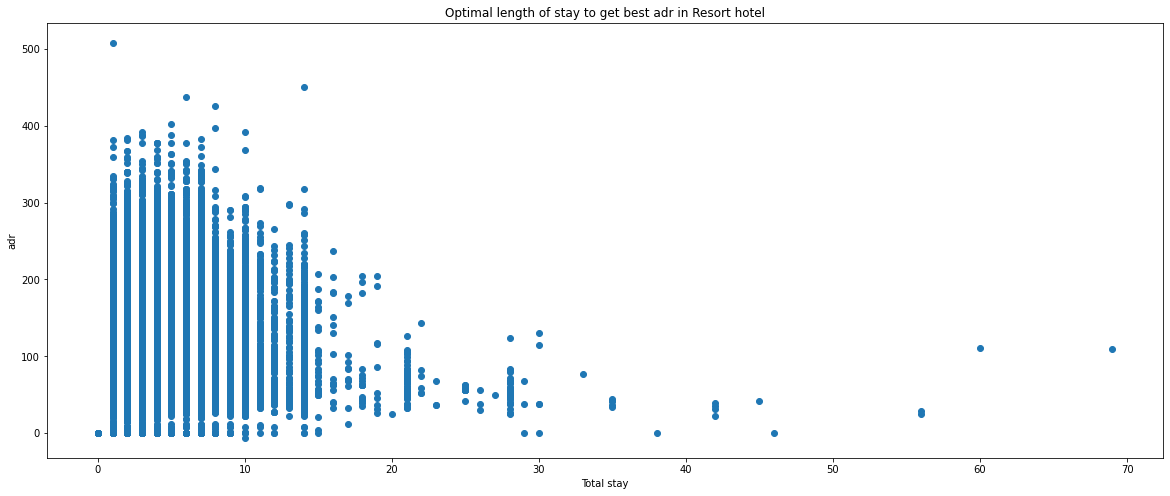

In [37]:
x_label = resort_hotel['total_stay_time']
y_label = resort_hotel['adr']
plt.rcParams["figure.figsize"] = (20,8)
plt.scatter(x_label,y_label)
plt.gca().update(dict(title='Optimal length of stay to get best adr in Resort hotel', xlabel='Total stay', ylabel='adr'))
plt.show()

**Total number of special requests analysis**

In [38]:
month_city_hotel = city_hotel.groupby('total_of_special_requests').size().sort_values(ascending=False).reset_index(name='city_hotel')
month_resort_hotel = resort_hotel.groupby('total_of_special_requests').size().sort_values(ascending=False).reset_index(name='resort_hotel')
hotel_month_count = pd.concat([month_city_hotel,month_resort_hotel],axis=1)
hotel_month_count = hotel_month_count.loc[:,~hotel_month_count.columns.duplicated()].copy()
hotel_month_count = hotel_month_count[hotel_month_count['total_of_special_requests'] > 0]
hotel_month_count = hotel_month_count.set_index(['total_of_special_requests'])

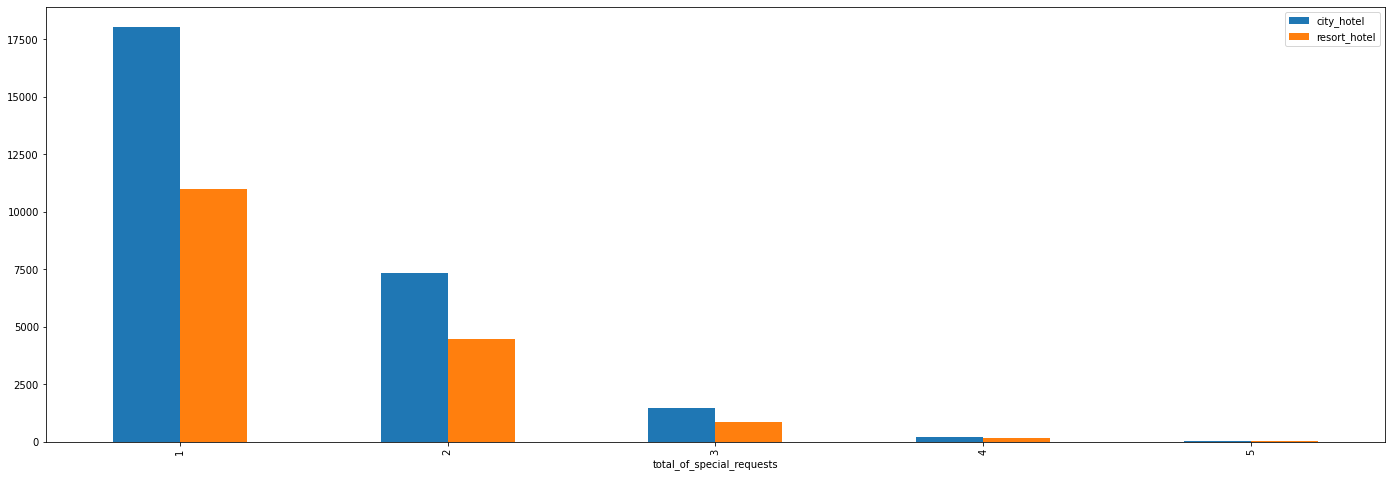

In [39]:
plt.rcParams["figure.figsize"] = (24,8)
hotel_month_count.plot(kind='bar')
plt.show()

In [40]:
df1['total_of_special_requests']

0         0
1         0
2         0
3         0
4         1
         ..
119385    0
119386    2
119387    4
119388    0
119389    2
Name: total_of_special_requests, Length: 87230, dtype: int64

# **CONCLUSION**

1. In the month of august has the highest number of booking and the most of  the guests are prefered city hotel.

2. City hotel has the higest canceled requests in comparison to resort hotel.

3. Most of the guests are from PRT and like to book resort hotel.

4. From the above scatter graph we can clearly see as number of days increase then adr is decreses.
5.City hotel has the highest number of special requests in comparison to resort hotel.

# **Univariate Analysis**






**Q.1 Which type of hotel people prefer the most?**

In [41]:
hotel_booking = df1.groupby(['hotel']).size()
booking_in_percentage = ((hotel_booking/hotel_booking.sum())*100).reset_index(name='booking%')

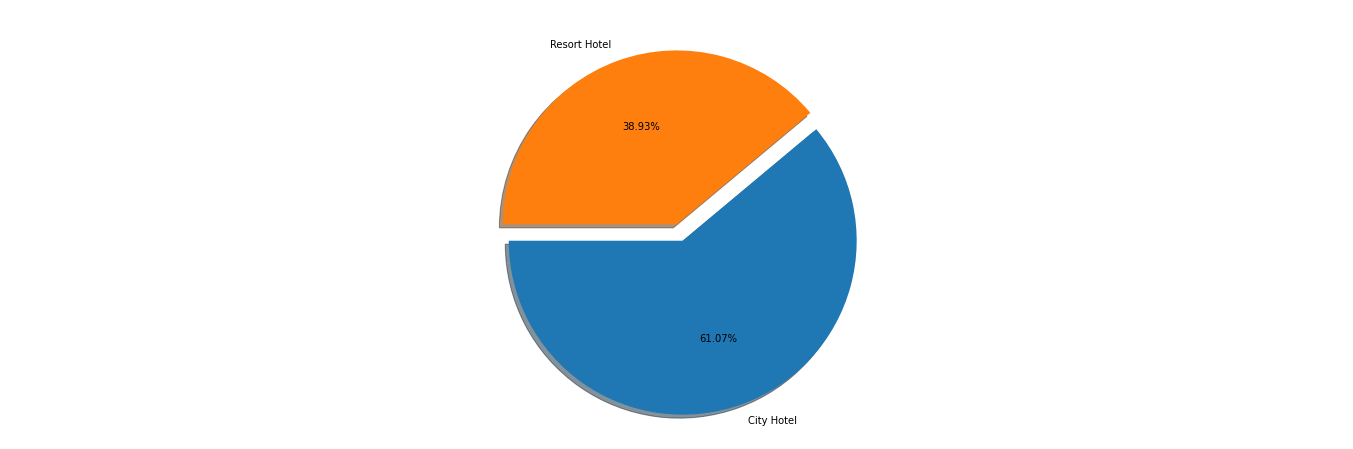

In [42]:
plt.axis('equal')
label = booking_in_percentage['hotel']
size = booking_in_percentage['booking%']
plt.pie(size,labels=label,autopct='%0.2f%%',explode=[0.1,0.0],startangle=180,shadow=True)
plt.show()

City Hotel people prefer the most.

Q.2 **Which month has highest number of booking?**

In [43]:
hotel_month = df1.groupby('arrival_date_month').size()
month_in_percentage = ((hotel_month/hotel_month.sum())*100).reset_index(name='month%').sort_values(by='month%',ascending=False)

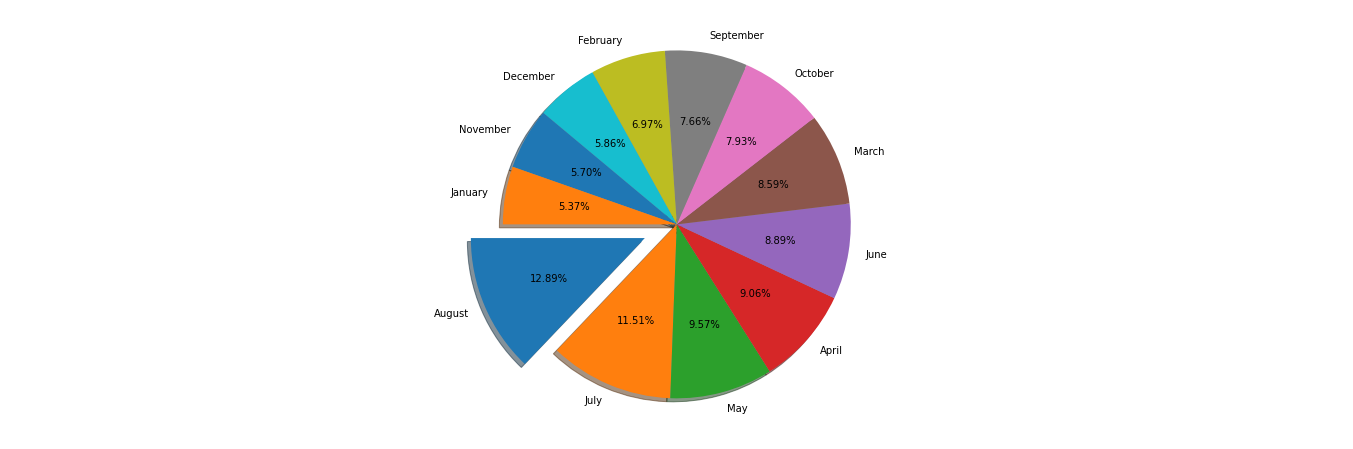

In [44]:
plt.axis('equal')
label = month_in_percentage['arrival_date_month']
size = month_in_percentage['month%']
plt.pie(size,labels=label,autopct='%0.2f%%',startangle=180,shadow=True,explode=[0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.show()

Most of the people like to book hotel in August.

**Q.3 Which type of meal guest prefer more?**

In [45]:
hotel_meal = df1.groupby('meal').size()
meal_in_percentage = ((hotel_meal/hotel_meal.sum())*100).reset_index(name='meal%').sort_values(by='meal%',ascending=False)

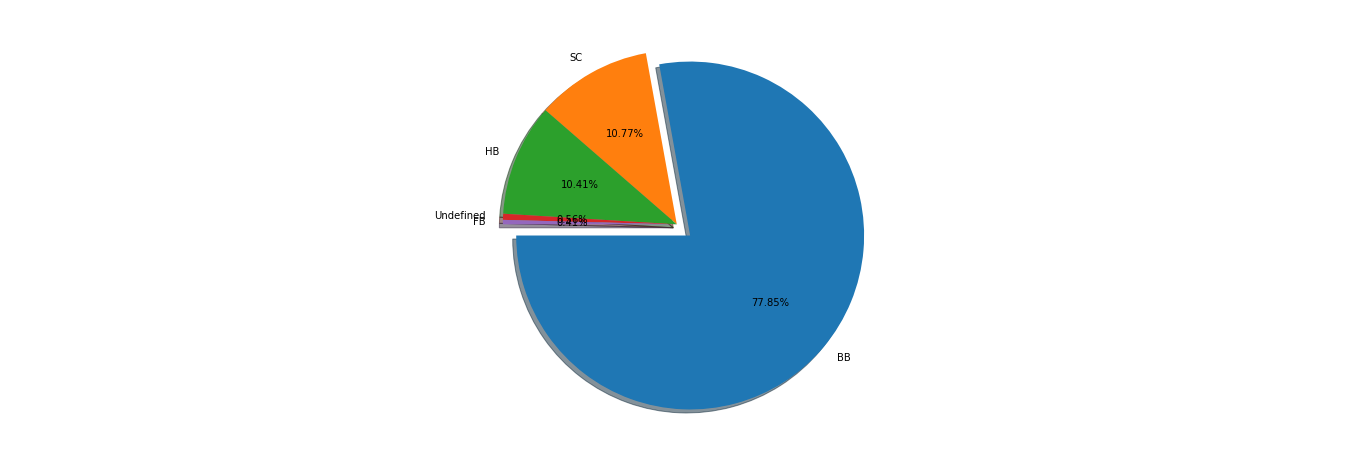

In [46]:
plt.axis('equal')
label = meal_in_percentage['meal']
size = meal_in_percentage['meal%']
plt.pie(size,labels=label,autopct='%0.2f%%',startangle=180,shadow=True,explode=[0.1,0.0,0.0,0.0,0.0])
plt.show()

BB prefer more people.

**Q.4 Which country has highest booking?**

In [47]:
#Here we are take only top 10 country whose booking is greater then 1000.
hotel_country = df1.groupby('country').size().reset_index(name='counts').sort_values(by='counts',ascending=False)
count_greater_then_1000 = hotel_country[hotel_country['counts'] > 1000][:10]

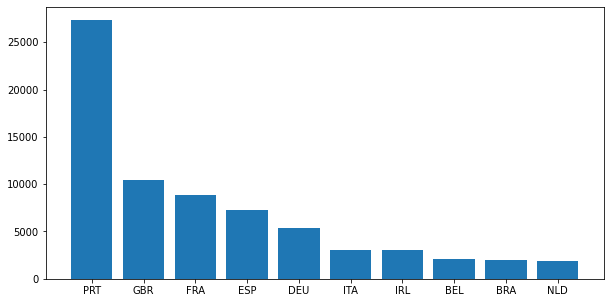

In [48]:
plt.figure(figsize=(10,5))
plt.bar(count_greater_then_1000['country'],count_greater_then_1000['counts'])
plt.show()

PRT has the highest number of booking.

**Q.5 Which is the highest market segment and distribution channel?** 

In [49]:
hotel_market = df1.groupby(['market_segment']).size().sort_values(ascending=False)
in_percentage_market = ((hotel_market/hotel_market.sum())*100).reset_index(name='market_segment%')

hotel_distribution = df1.groupby('distribution_channel').size().sort_values(ascending=False)
in_percentage_channel = ((hotel_distribution/hotel_distribution.sum())*100).reset_index(name='distribution_channel%')

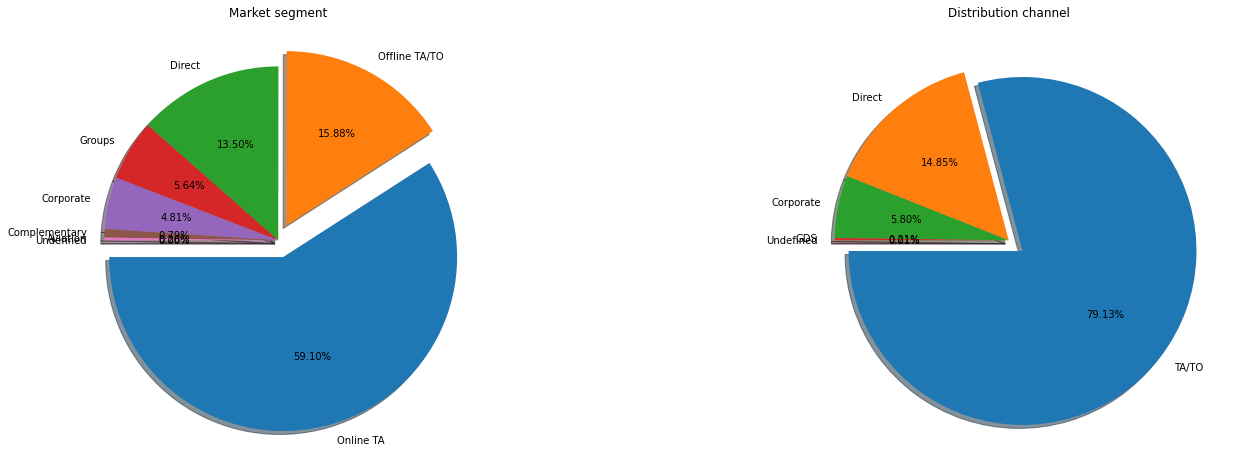

In [50]:
plt.figure(figsize=(24,8))
plt.axis('equal')

label1 = in_percentage_market['market_segment']
size1 = in_percentage_market['market_segment%']
plt.subplot(1,2,1)
plt.pie(size1,labels = label1,radius=1,autopct='%0.2f%%',shadow=True,startangle=180,explode=[0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title('Market segment')

label2 = in_percentage_channel['distribution_channel']
size2 = in_percentage_channel['distribution_channel%']
plt.subplot(1,2,2)
plt.pie(size2,labels = label2,radius=1,autopct='%0.2f%%',shadow=True,startangle=180,explode=[0.1,0.0,0.0,0.0,0.0])
plt.title('Distribution channel')

plt.show()

Most of the market segment used is online TA and offline TA/TO.
79.13 % distribution channel is TA/TO.

**Q.6 Which type of room guest like to reserved and how many rooms assigned to same room type?**

In [51]:
hotel_room = df1.groupby('reserved_room_type').size().sort_values(ascending=False)
in_percentage_hotel_room = ((hotel_room/hotel_room.sum())*100).reset_index(name='room%')

hotel_assigned = df1.groupby('assigned_room_type').size().sort_values(ascending=False)
in_percentage_assigned = ((hotel_assigned/hotel_assigned.sum())*100).reset_index(name='assigned%')

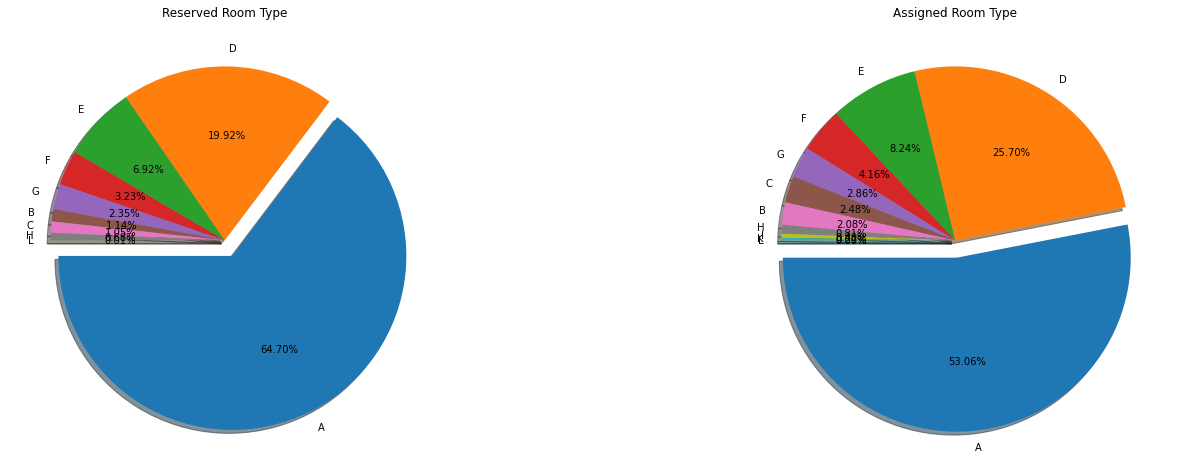

In [52]:
plt.figure(figsize=(24,8))
plt.axis('equal')

label1 = in_percentage_hotel_room['reserved_room_type']
size1 = in_percentage_hotel_room['room%']
plt.subplot(1,2,1)
plt.pie(size1,labels = label1,autopct='%0.2f%%',radius = 1,shadow=True,startangle=180,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title('Reserved Room Type')

label2 = in_percentage_assigned['assigned_room_type']
size2 = in_percentage_assigned['assigned%']
plt.subplot(1,2,2)
plt.pie(size2,labels = label2,autopct='%0.2f%%',radius = 1,shadow=True,startangle=180,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title('Assigned Room Type')

plt.show()

64.70% guest reserved room type A but only 53.06% is actually assigned in the same room.

**Q.7 Which deposite type guests are prefered the most?**

In [53]:
hotel_deposit = df1.groupby('deposit_type').size().sort_values(ascending=False)
in_percentage_deposit = ((hotel_deposit/hotel_deposit.sum())*100).reset_index(name='deposit%')

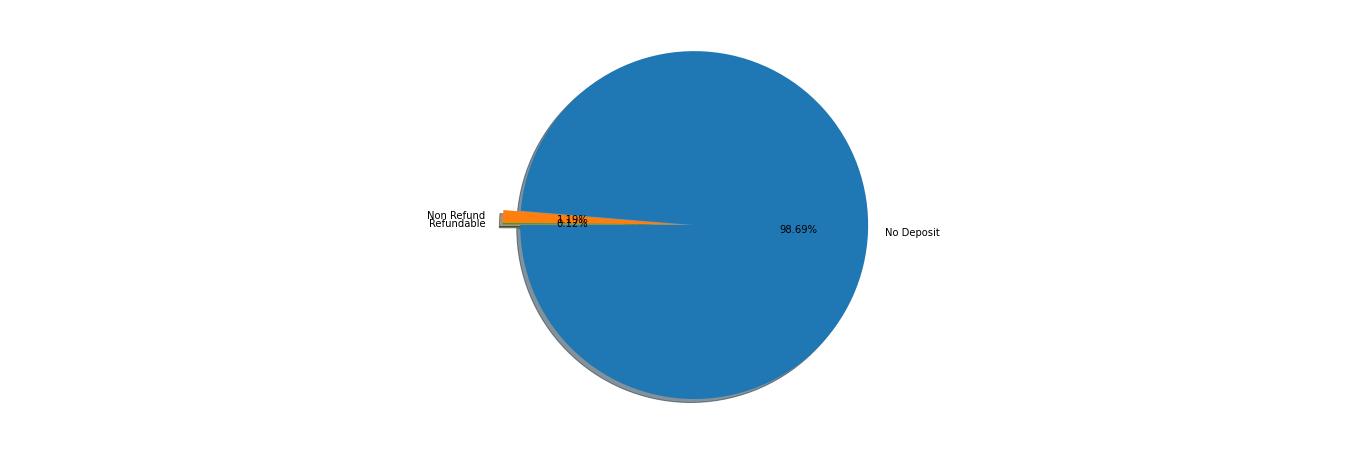

In [54]:
plt.axis('equal')
label = in_percentage_deposit['deposit_type']
size = in_percentage_deposit['deposit%']
plt.pie(size,labels=label,autopct='%0.2f%%',startangle=180,shadow=True,explode=[0.1,0.0,0.0])
plt.show()

**Q.8 Which type of customer visit the hotel most?**

In [55]:
hotel_customer = df1.groupby('customer_type').size().sort_values(ascending=False)
in_percentage_customer = ((hotel_customer/hotel_customer.sum())*100).reset_index(name='customer%')

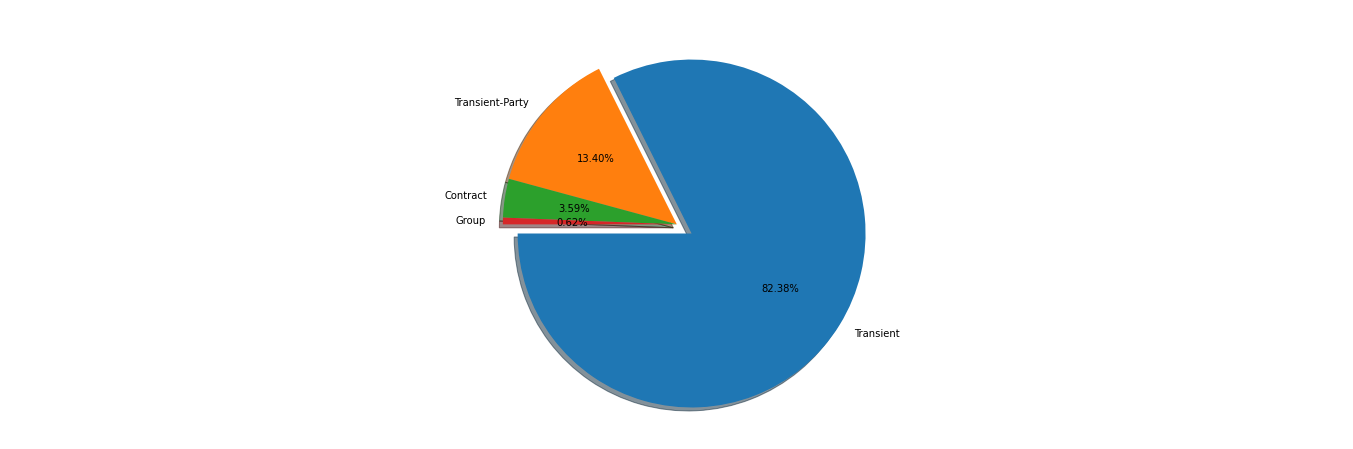

In [56]:
plt.axis('equal')
label = in_percentage_customer['customer_type']
size = in_percentage_customer['customer%']
plt.pie(size,labels = label, autopct='%0.2f%%',startangle=180,shadow=True,explode=[0.1,0.0,0.0,0.0])
plt.show()

82.38 % customer type are trasient.

**Q.9 Checking reservation status.** 

In [57]:
hotel_reservation = df1.groupby('reservation_status').size().sort_values(ascending=False)
in_percentage_reservation = ((hotel_reservation/hotel_reservation.sum())*100).reset_index(name='reservation%')

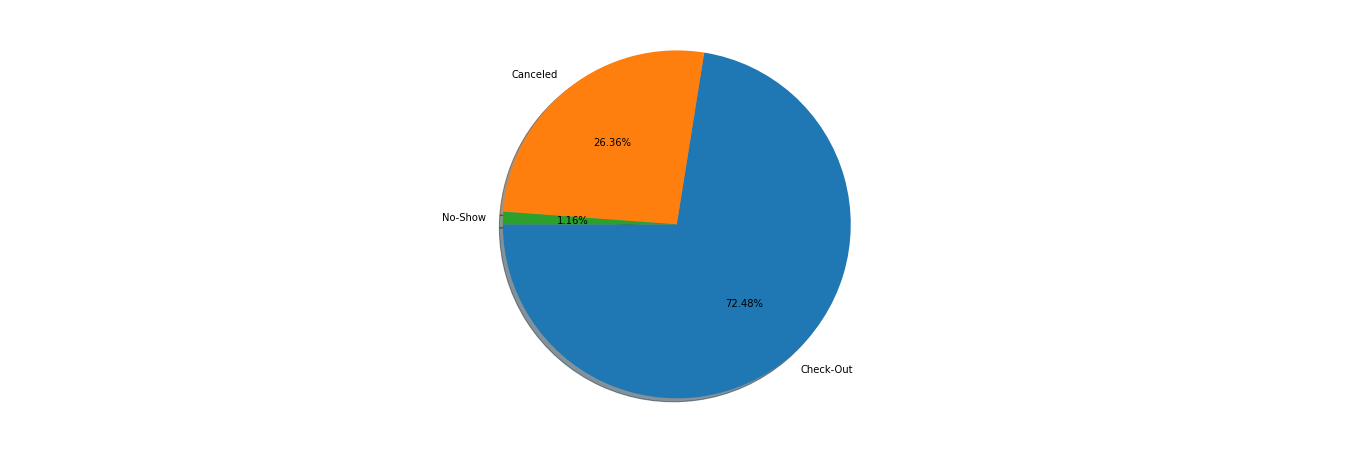

In [58]:
plt.axis('equal')
label = in_percentage_reservation['reservation_status']
size = in_percentage_reservation['reservation%']
plt.pie(size,labels=label,radius=1,autopct='%0.2f%%',startangle=180,shadow=True)
plt.show()

72.48 % guests are check-out.
26.36 % guests are canceled their reservation.

# **CONCLUSION**

1. 61.07 % guests prefered city hotel and 38.93 % are prefered resort hotel.

2. Highest number of booking in august that is 12.89 %.

3. 77.85 % guests are prefered BB meal.

4. Highest number of bookings from then country PRT.

5. Most of the market segment used is online TA and offline TA/TO. 79.13 % distribution channel is TA/TO.

6. 64.70% guest reserved room type A but only 53.06% is actually assigned in the same room.

7. 98.69 % guests are prefered no deposite type.

8. 82.38 % customer type are trasient.

9. 72.48 % guests are check-out. 26.36 % guests are canceled their reservation.